## Previsão de consumo de energia por hora

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('PJME_hourly.csv', index_col = [0], parse_dates = [0])
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<AxesSubplot:title={'center':'PJM East'}, xlabel='Datetime'>

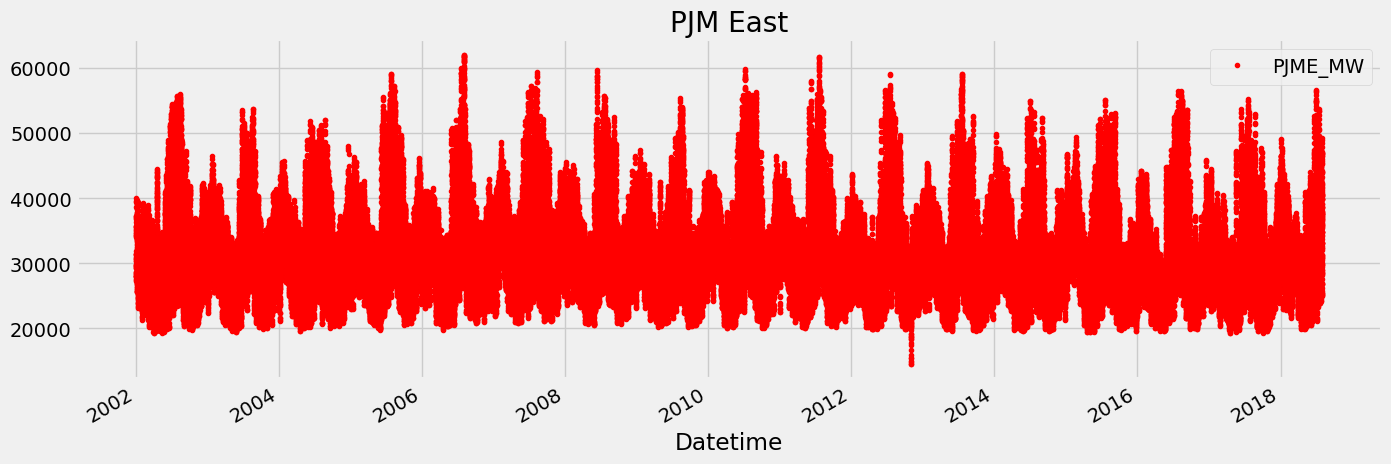

In [3]:
df.plot(style = '.', color = 'red', figsize = (15,5), title = 'PJM East')

### EDA

In [4]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
df.drop(['date'], axis = 1, inplace = True)

C:\Users\rafa_\AppData\Local\Temp\ipykernel_15376\2381250110.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [5]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


In [6]:
df.isna().sum(axis = 0)

PJME_MW       0
hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
dtype: int64

c:\Users\rafa_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='PJME_MW'>

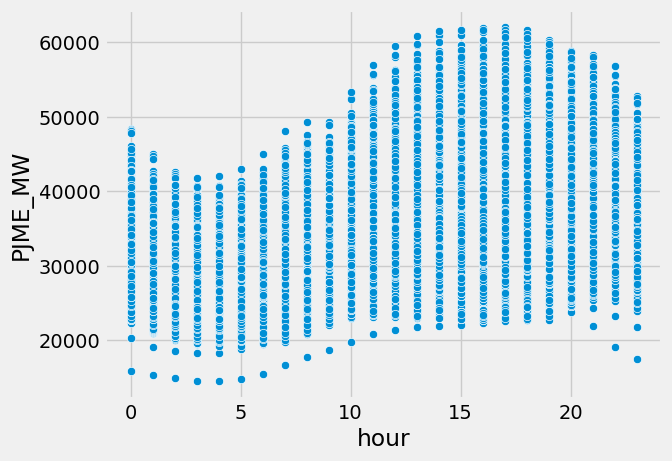

In [7]:
sns.scatterplot('hour', 'PJME_MW', data = df)

c:\Users\rafa_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dayofweek', ylabel='PJME_MW'>

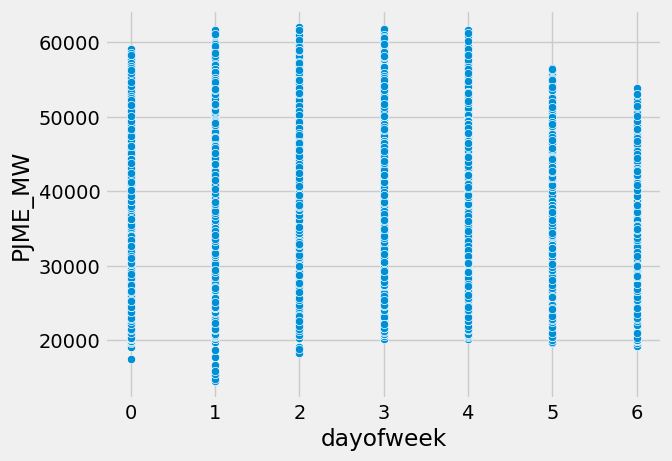

In [8]:
sns.scatterplot('dayofweek', 'PJME_MW', data = df)

c:\Users\rafa_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='PJME_MW'>

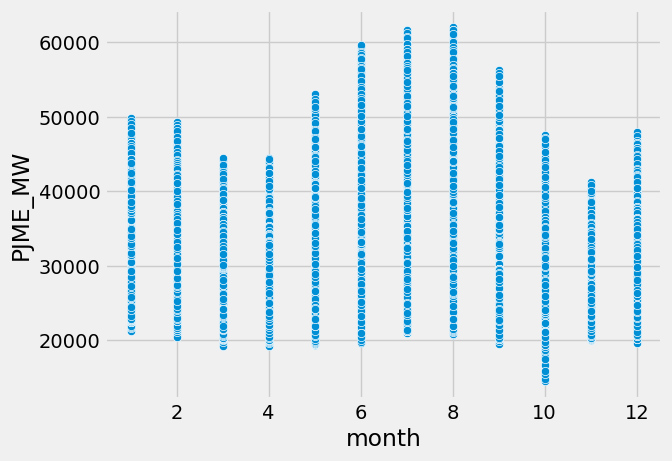

In [9]:
sns.scatterplot('month', 'PJME_MW', data = df)

c:\Users\rafa_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

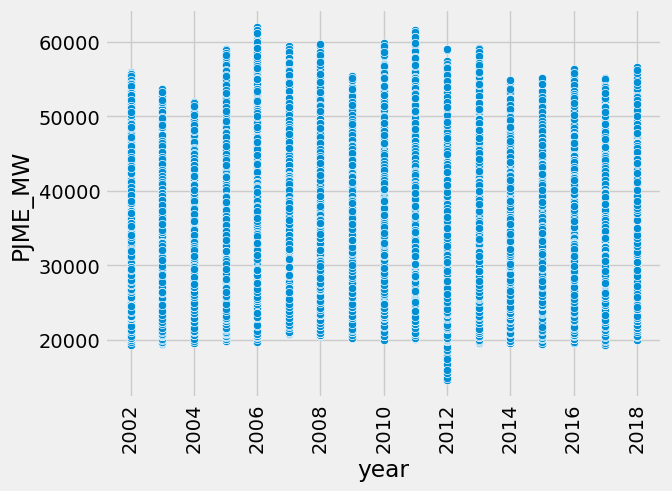

In [10]:
sns.scatterplot('year', 'PJME_MW', data = df)
plt.xticks(rotation = 'vertical')

c:\Users\rafa_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekofyear', ylabel='PJME_MW'>

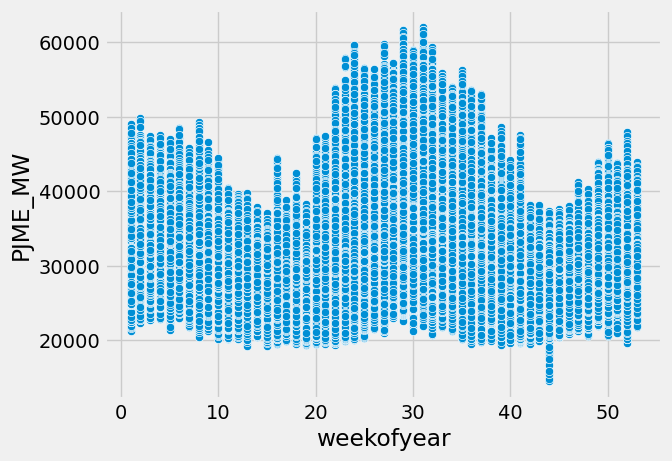

In [11]:
sns.scatterplot('weekofyear', 'PJME_MW', data = df)

### Train-Test Split

In [12]:
df_train = df.loc[df.year < 2015]
df_test = df.loc[df.year >= 2015]

In [13]:
df_train.tail()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2014-01-01 20:00:00,36193.0,20,2,1,1,2014,1,1,1
2014-01-01 21:00:00,35601.0,21,2,1,1,2014,1,1,1
2014-01-01 22:00:00,34242.0,22,2,1,1,2014,1,1,1
2014-01-01 23:00:00,32215.0,23,2,1,1,2014,1,1,1
2014-01-02 00:00:00,30159.0,0,3,1,1,2014,2,2,1


In [14]:
df_test.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,1,1
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365,31,53
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365,31,53
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365,31,53
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365,31,53


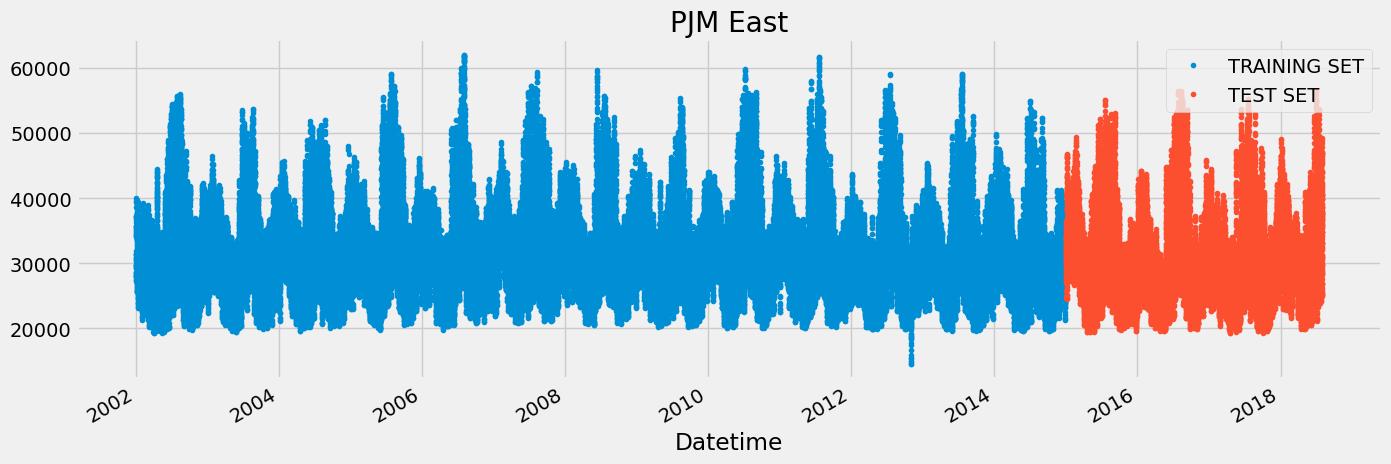

In [41]:
(df_train.rename(columns={'PJME_MW': 'TRAINING SET'})).append(df_test.rename(columns={'PJME_MW': 'TEST SET'}), 
                                                              sort = False)[['TRAINING SET','TEST SET']].plot(style='.', 
                                                                                                              figsize = (15,5), title = "PJM East");

In [16]:
x_train = df_train[['hour','dayofweek','quarter','month','year',
                    'dayofyear','dayofmonth','weekofyear']]
x_test = df_test[['hour','dayofweek','quarter','month','year',
                  'dayofyear','dayofmonth','weekofyear']]

y_train = df_train[['PJME_MW']]
y_test = df_test[['PJME_MW']]

### XG Boost Model

In [17]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [18]:
reg = xgb.XGBRegressor(n_estimators = 1000)
reg.fit(x_train, y_train,
        eval_set = [(x_train, y_train), (x_test, y_test)], early_stopping_rounds=50, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

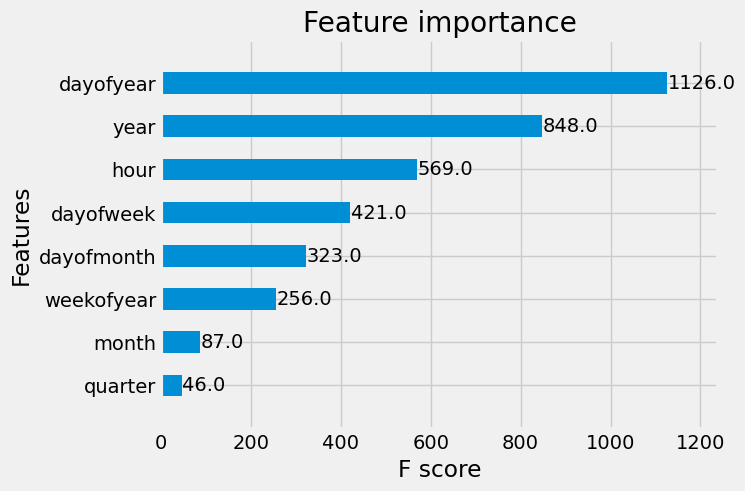

In [19]:
plot_importance(reg, height = 0.5)

In [20]:
df_test['MW_Prediction'] = reg.predict(x_test)
df_all = pd.concat([df_test, df_train], sort = False)

C:\Users\rafa_\AppData\Local\Temp\ipykernel_15376\3985041167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MW_Prediction'] = reg.predict(x_test)


<AxesSubplot:xlabel='Datetime'>

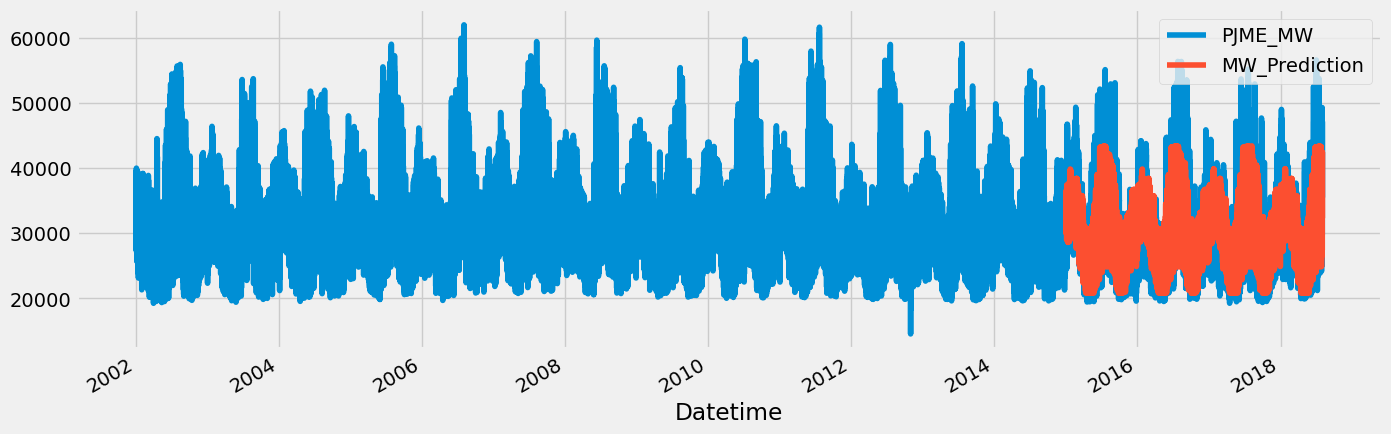

In [21]:
df_all[['PJME_MW', 'MW_Prediction']].plot(figsize = (15,5))

### Primeiro mês de previsão

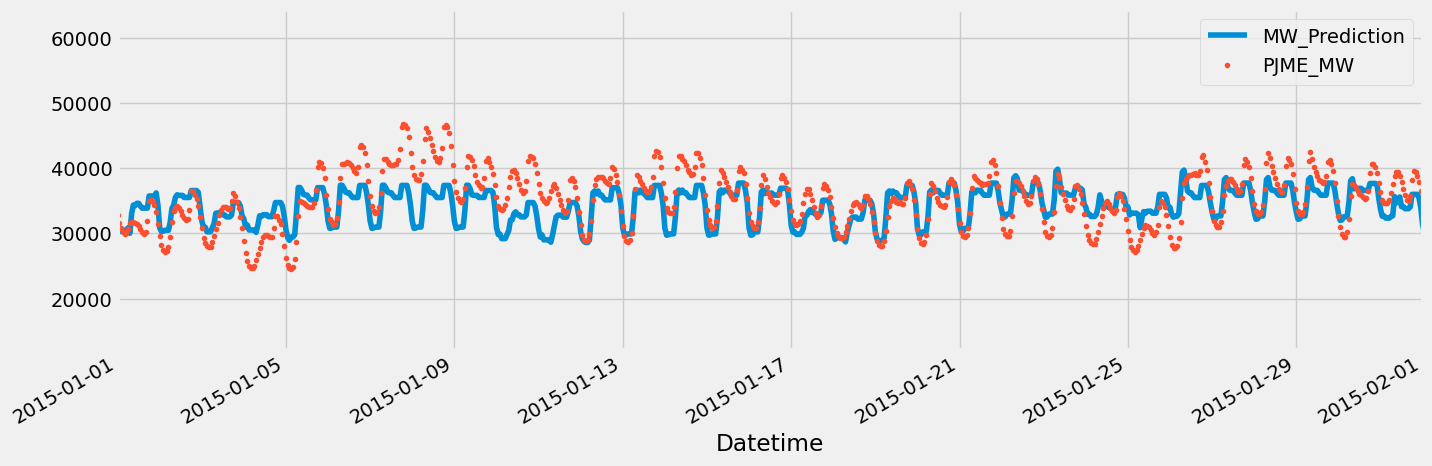

In [22]:
_, ax = plt.subplots(1)
df_all[['MW_Prediction', 'PJME_MW']].plot(ax = ax, style = ['-', '.'], figsize = (15,5))
ax.set_xbound(lower = '01-01-2015', upper = '02-01-2015')

### Primeira semana de janeiro


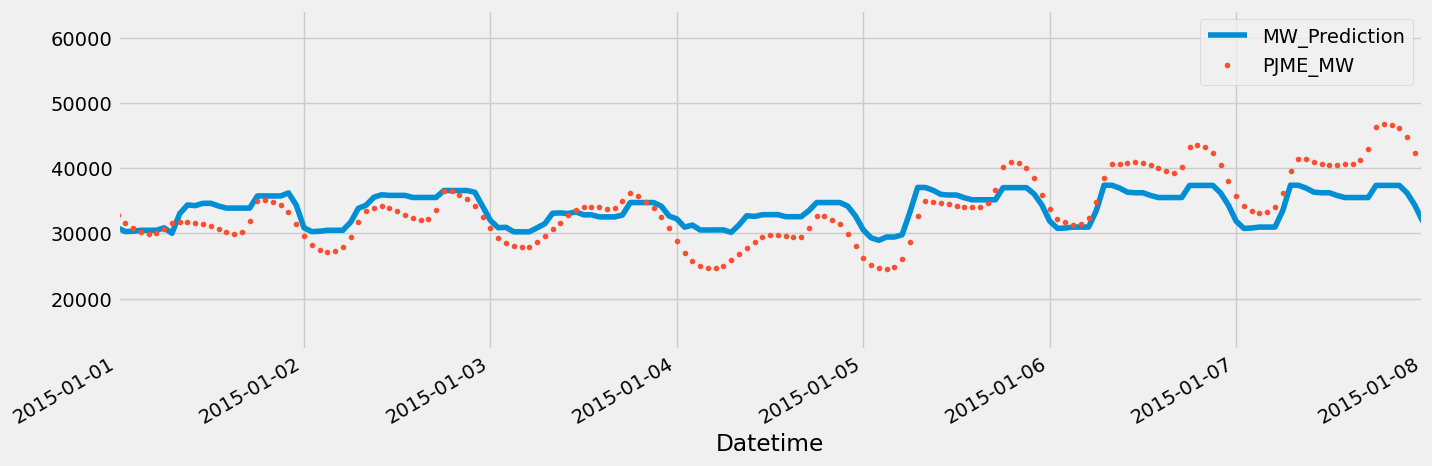

In [23]:
_, ax = plt.subplots(1)
df_all[['MW_Prediction','PJME_MW']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='01-01-2015', upper='01-08-2015')

### Primeira semana de julho

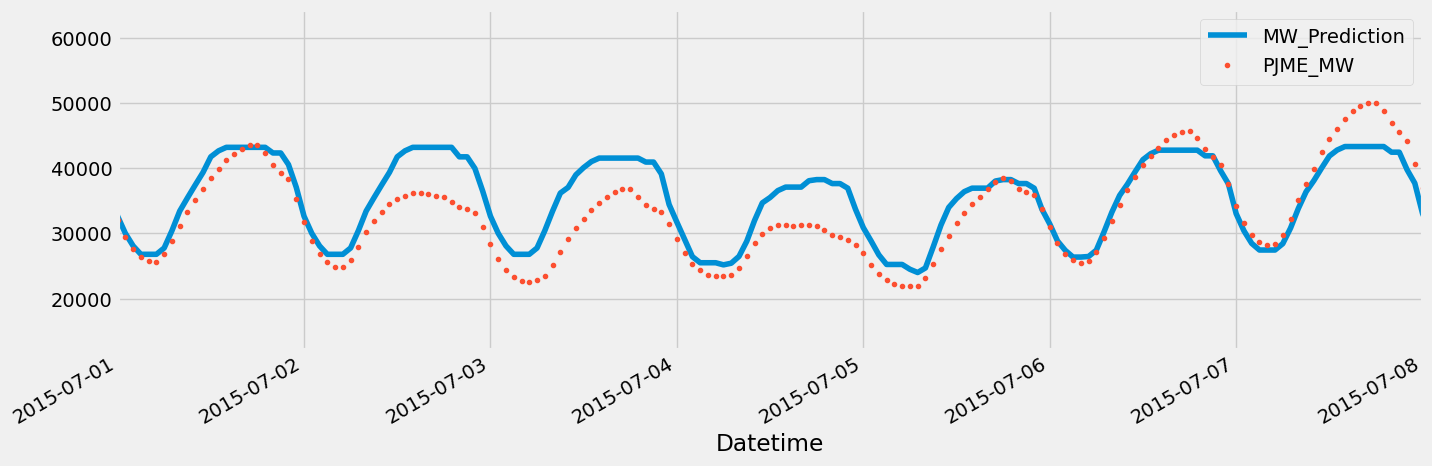

In [24]:
_, ax = plt.subplots(1)
df_all[['MW_Prediction','PJME_MW']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='07-01-2015', upper='07-08-2015')

### Métricas de erro

In [25]:
mean_squared_error(y_true = df_test['PJME_MW'],
                   y_pred = df_test['MW_Prediction'])

13972594.561315235

In [26]:
mean_absolute_error(y_true = df_test['PJME_MW'],
                    y_pred = df_test['MW_Prediction'])

2758.3374049528866

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true = df_test['PJME_MW'],
                               y_pred = df_test['MW_Prediction'])

8.514829643514457

### Análise dos piores e melhores dias previstos

In [28]:
df_test['error'] = df_test['PJME_MW'] - df_test['MW_Prediction']
df_test['abs_error'] = df_test['error'].apply(np.abs)

C:\Users\rafa_\AppData\Local\Temp\ipykernel_15376\861847098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['error'] = df_test['PJME_MW'] - df_test['MW_Prediction']
C:\Users\rafa_\AppData\Local\Temp\ipykernel_15376\861847098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['abs_error'] = df_test['error'].apply(np.abs)


In [30]:
error_by_day = df_test.groupby(['year', 'month', 'dayofmonth']).mean()[['PJME_MW', 'MW_Prediction', 'error', 'abs_error']]

In [32]:
error_by_day.head(10)

PJME_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2015 1     1           31765.583333   33249.292969 -1483.711182  1928.522217
           2           32141.166667   34194.136719 -2052.970622  2052.970622
           3           32014.375000   32557.800781  -543.424805  1515.881348
           4           28542.291667   32456.683594 -3914.391439  3914.391439
           5           33176.125000   34326.531250 -1150.405599  2775.779948
           6           38358.833333   34931.218750  3427.615072  3427.615072
           7           40181.875000   34931.218750  5250.656738  5250.656738
           8           42445.375000   34931.218750  7514.156738  7514.156738
           9           38524.666667   34742.890625  3781.776530  3781.776530
           10          37703.583333   32122.144531  5581.437826  5581.437826

### Nos dias previstos

In [33]:
error_by_day.sort_values('error', ascending = True).head(10)

PJME_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2016 7     4           28399.958333   36429.968750 -8030.010417  8030.010417
2017 2     24          26445.083333   34408.156250 -7963.071615  7963.071615
           25          24344.458333   31977.609375 -7633.151937  7633.151937
     9     4           26552.416667   33609.296875 -7056.879150  7056.879150
     2     20          27070.583333   33839.445312 -6768.862549  6768.862549
     9     1           27280.500000   33966.433594 -6685.933675  6685.933675
     2     19          24555.500000   31167.101562 -6611.600667  6611.600667
2018 2     21          27572.500000   34039.832031 -6467.332357  6467.332357
2017 3     1           27574.125000   34039.832031 -6465.707357  6465.707357
     2     23          27663.416667   34123.984375 -6460.566406  6460.566406

Como podemos ver, o 1º pior dia: 4 de julho de 2016 - Feriado 3º pior dia: 25 de dezembro de 2015 - Natal 5º pior dia: 4 de julho de 2016 - Feriado

Devemos considerar feriados em nossa análise.

### Piores dias absolutos previstos

In [34]:
error_by_day.sort_values('abs_error', ascending = False).head(10)

PJME_MW  MW_Prediction         error     abs_error
year month dayofmonth                                                         
2016 8     13          45185.833333   31390.154297  13795.678385  13795.678385
           14          44427.333333   31191.337891  13235.994873  13235.994873
     9     10          40996.166667   27985.207031  13010.958740  13010.958740
           9           43836.958333   32078.449219  11758.509521  11758.509521
     8     12          45724.708333   34440.363281  11284.346680  11284.346680
2018 1     6           43565.750000   32557.800781  11007.950195  11007.950195
2015 2     20          44694.041667   33856.789062  10837.253011  10837.253011
2017 5     19          38032.583333   27777.480469  10255.102376  10255.102376
2015 2     16          43949.500000   33839.445312  10110.054118  10110.054118
     9     9           42266.875000   32276.318359   9990.557292   9990.557292

### Melhores dias absolutos previstos

In [35]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

PJME_MW  MW_Prediction       error   abs_error
year month dayofmonth                                                     
2018 5     13          24001.500000   24224.474609 -222.975342  342.367757
2016 4     4           28944.125000   28570.103516  374.020915  429.543050
     9     28          27910.833333   28260.000000 -349.165690  479.749349
2015 10    3           25534.875000   25807.451172 -272.576579  485.649495
     9     22          28185.875000   28314.898438 -129.023112  496.091471
     4     20          27369.000000   27608.816406 -239.816081  503.777832
2018 5     17          28035.208333   28513.140625 -477.933268  515.684733
2015 9     21          27988.041667   28057.158203  -69.116943  517.132568
2016 10    2           24659.083333   25022.265625 -363.183187  520.482666
2017 5     13          24752.333333   24626.041016  126.291829  531.500651

Os melhores dias previstos parecem ser muito outubro (não muitos feriados e clima ameno) Também início de maio.

### Traçando os melhores/piores dias previstos

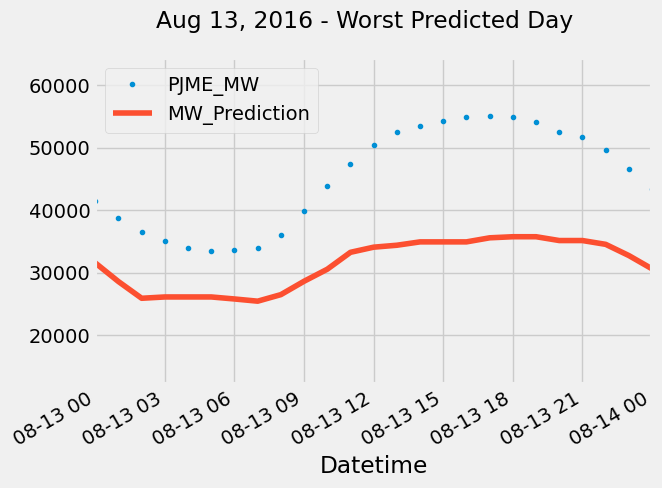

In [36]:
_, ax = plt.subplots(1)
df_all[['PJME_MW','MW_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='08-13-2016', upper='08-14-2016')
plot = plt.suptitle('Aug 13, 2016 - Worst Predicted Day')

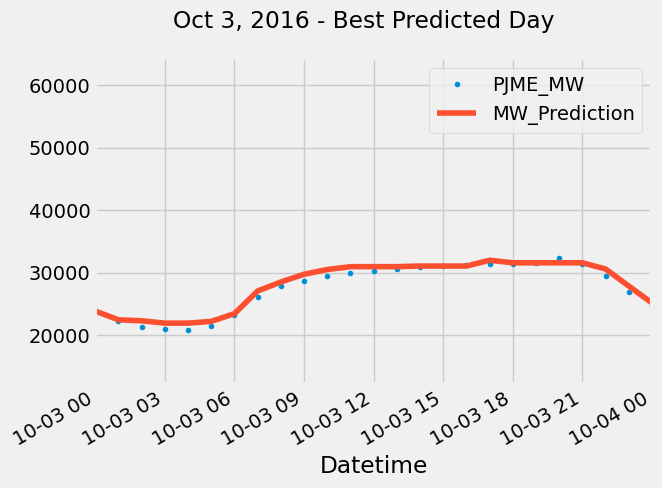

In [37]:
_, ax = plt.subplots(1)
df_all[['PJME_MW','MW_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='10-03-2016', upper='10-04-2016')
plot = plt.suptitle('Oct 3, 2016 - Best Predicted Day')